In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
#import CSV file
red_df = pd.read_csv('Resources/Data/winequality-red.csv', delimiter=';')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# drop duplicate data
red_df = red_df.drop_duplicates(keep = 'first', inplace = False)
red_df = red_df.dropna(axis = 'columns', how='all')
red_df = red_df.reset_index(drop = True)

In [4]:
red_stats = red_df.describe()
red_stats.drop(["count"], axis=0, inplace=True)
red_stats.T

,mean,std,min,25%,50%,75%,max
fixed acidity,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [5]:
#datatype 
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [6]:
# check for null values
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
red_df.shape

(1359, 12)

In [8]:
red_df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

# Select your features (columns)

In [9]:
# categorize wine quality
bins = [2,6,9]
group_names = ['Fair','Very Good']
red_df['quality']= pd.cut(red_df['quality'], bins, labels = group_names)

In [10]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Fair
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Fair
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Fair
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Fair
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Fair


In [11]:
X = red_df.drop("quality", axis =1)
y = red_df["quality"]

In [12]:
#X.head()

In [13]:
#y.head()

In [14]:
red_df['quality'].value_counts()

Fair         1175
Very Good     184
Name: quality, dtype: int64

[0.0787116  0.0955449  0.09207472 0.07434899 0.07010926 0.06768806
 0.0861458  0.08721039 0.06762909 0.11352248 0.1670147 ]


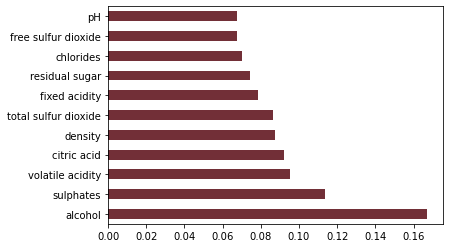

In [15]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns )
feat_importances.nlargest(11).plot(kind= "barh" , color = "#722F37")
plt.savefig('Resources/images/red_features_importance.jpg')
plt.show()


In [16]:
feat_importances.sort_values(ascending=False)

alcohol                 0.167015
sulphates               0.113522
volatile acidity        0.095545
citric acid             0.092075
density                 0.087210
total sulfur dioxide    0.086146
fixed acidity           0.078712
residual sugar          0.074349
chlorides               0.070109
free sulfur dioxide     0.067688
pH                      0.067629
dtype: float64

In [17]:
# Selected important features : top 5 features (red)
selected_features = X[['alcohol', 'sulphates','volatile acidity','citric acid','density']]
                         

# Create a Train Test Split 
### All Features

In [18]:
# Split the data using train_test_split
# create the train and validation datasets
# test with all features
from sklearn.model_selection import train_test_split

X_train, X_left, y_train, y_left = train_test_split(X, y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [19]:
X_train.shape, X_val.shape, X_test.shape

((951, 11), (285, 11), (123, 11))

# Pre-pocessing 

In [22]:
# Scale your data
X_scale = StandardScaler().fit(X_train)

X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [23]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(951, 5) (123, 5) (951,)


# Train the Model

In [24]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)

SVC()

In [25]:
#And score the model using the unseen testing data
model_svm.score(X_train, y_train), model_svm.score(X_val, y_val)

(0.8759200841219769, 0.8280701754385965)

In [26]:
# Overall Score for the model
model_svm.score(X_val, y_val)

0.8280701754385965

In [27]:
print(f"Training Data Score: {model_svm.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_svm.score(X_test_scaled, y_test)}")

Training Data Score: 0.8969505783385909
Testing Data Score: 0.8780487804878049


In [28]:
predictions = model_svm.predict(X_test_scaled)

In [29]:
# Calculate classification report (all features)

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,
                           ))

              precision    recall  f1-score   support

        Fair       0.91      0.95      0.93       106
   Very Good       0.58      0.41      0.48        17

    accuracy                           0.88       123
   macro avg       0.75      0.68      0.71       123
weighted avg       0.86      0.88      0.87       123



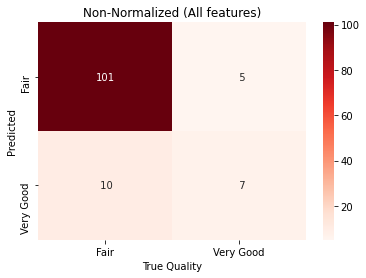

In [31]:
# Plot Confusion Matrix (all features)

label_aux = plt.subplot()
cm_svm_red = confusion_matrix(y_test, predictions)
cm_svm = pd.DataFrame(cm_svm_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.Reds,fmt='3')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_title('Non-Normalized (All features)')
plt.savefig('Resources/images/svm_red_cm_non-nor_all.jpg');

# Hyperparameter Tuning (GridSearchCV)

In [32]:
from pprint import pprint
print('Parameters:\n')
pprint(model_svm.get_params())

Parameters:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [33]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [ 0.01,0.1,1,5,10],
              'gamma': [0.01,0.1,1,10],
              'kernel': ['linear', 'rbf', 'sigmoid']}

grid = GridSearchCV(model_svm, param_grid, verbose=3, return_train_score=True, scoring='accuracy' , cv=10)

In [34]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.876, test=0.875), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.875, test=0.884), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.875, test=0.884), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.876, test=0.874

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.876, test=0.875), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.875, test=0.884), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.875, test=0.884), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid

[CV]  C=0.01, gamma=1, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.876, test=0.875), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.875, test=0.884), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.875, test=0.884), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.876, test=0.

[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, score=(train=0.876, test=0.875), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, score=(train=0.875, test=0.884), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, score=(train=0.875, t

[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=

[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.875), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.875, test=0.884), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.875, test=0.884), to

[CV]  C=1, gamma=1, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=(train=0.876, test=0.874), total=   0.0s


[CV]  C=5, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.875), total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=(train=0.875, test=0.884), total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=(train=0.875, test=0.884), total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s


[CV]  C=5, gamma=1, kernel=rbf, score=(train=0.953, test=0.905), total=   0.0s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV]  C=5, gamma=1, kernel=rbf, score=(train=0.953, test=0.905), total=   0.0s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV]  C=5, gamma=1, kernel=rbf, score=(train=0.959, test=0.874), total=   0.0s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV]  C=5, gamma=1, kernel=rbf, score=(train=0.959, test=0.905), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.804, test=0.750), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.794, test=0.874), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.796, test=0.842), total=   0.0s
[CV] C=5,

[CV]  C=10, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=(train=0.879, test=0.874), total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=(train=0.876, test=0.874), total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=(train=0.873, test=0.875), total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=(train=0.871, test=0.884), total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=(train=0.873, test

[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.967, test=0.905), total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.968, test=0.863), total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.967, test=0.895), total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=(train=0.805, test=0.750), total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=(train=0.793, test=0.874), total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=(train=0.789, test=0.832), total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=(train=0.806, test=0.842), total=   0.0

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    8.5s finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.8917105263157895


In [36]:
# Make predictions with the hypertuned model
grid_predictions = grid.predict(X_test_scaled)

## Classification report 
### All Features

In [37]:
# Calculate classification report - all features

from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions
                           ))

              precision    recall  f1-score   support

        Fair       0.89      0.98      0.93       106
   Very Good       0.67      0.24      0.35        17

    accuracy                           0.88       123
   macro avg       0.78      0.61      0.64       123
weighted avg       0.86      0.88      0.85       123



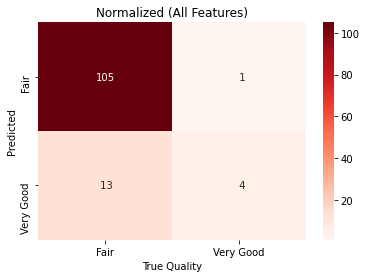

In [37]:
# Plot Confusion Matrix - (Normalized)

label_aux = plt.subplot()
cm_svm_red = confusion_matrix(y_test, grid_predictions)
cm_svm = pd.DataFrame(cm_svm_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.Reds,fmt='3')
#label_aux.set_title('Normalized')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_title('Normalized (All Features)')
plt.savefig('Resources/images/svm_red_cm_nor_all.jpg');

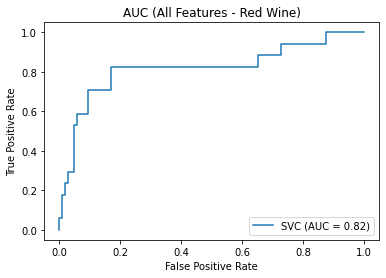

In [47]:
from sklearn.metrics import plot_roc_curve

svm_disp = plot_roc_curve(model_svm, X_test_scaled, y_test)
plt.title('AUC (All Features - Red Wine)')
plt.savefig('Resources/images/svm_red_auc_all.jpg');
plt.show()

In [40]:
# Save the Model (test all features, selected features)
import joblib
filename = 'Resources/results/svm_red_all.sav'
joblib.dump(model_svm, filename)

['Resources/results/svm_red_all.sav']

## Top 5 Features

In [18]:
# y = selected features - top 5 features 
from sklearn.model_selection import train_test_split
X_train, X_left, y_train, y_left = train_test_split(selected_features, y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [19]:
X_train.shape, X_val.shape, X_test.shape

((951, 5), (285, 5), (123, 5))

# Pre-processing

In [20]:
# Scale your data
X_scale = StandardScaler().fit(X_train)

X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [21]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(951, 5) (123, 5) (951,)


# Train the Model

In [22]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)

SVC()

In [23]:
#And score the model using the unseen testing data
model_svm.score(X_train, y_train), model_svm.score(X_val, y_val)

(0.868559411146162, 0.8526315789473684)

In [24]:
# Overall Score for the model
model_svm.score(X_val, y_val)

0.8526315789473684

In [25]:
print(f"Training Data Score: {model_svm.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_svm.score(X_test_scaled, y_test)}")

Training Data Score: 0.8948475289169295
Testing Data Score: 0.8861788617886179


In [26]:
predictions = model_svm.predict(X_test_scaled)

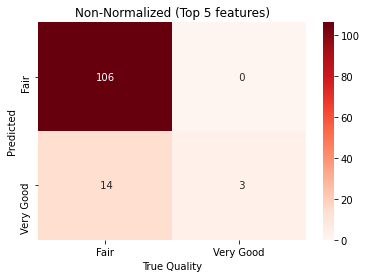

In [27]:
# Plot Confusion Matrix (selected features)

label_aux = plt.subplot()
cm_svm_red = confusion_matrix(y_test, predictions)
cm_svm = pd.DataFrame(cm_svm_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.Reds,fmt='3')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted');
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_title('Non-Normalized (Top 5 features)')
plt.savefig('Resources/images/svm_red_cm_non-nor_selected.jpg');

# Hyperparameter Tuning (GridSearchCV)

In [28]:
from pprint import pprint
print('Parameters:\n')
pprint(model_svm.get_params())

Parameters:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [29]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [ 0.01,0.1,1,5,10],
              'gamma': [0.01,0.1,1,10],
              'kernel': ['linear', 'rbf', 'sigmoid']}

grid = GridSearchCV(model_svm, param_grid, verbose=3, return_train_score=True, scoring='accuracy' , cv=10)

In [30]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.869, test=0.865), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.868, test=0.874

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, gamma=0.01, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.869, test=0.865), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=

[CV]  C=0.01, gamma=1, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.869, test=0.865), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.868, test=0.874)

[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.869, test=0.863), 

[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=(train=0.826, test=0.802), total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=(train=0.812, test=0.800), total=   0.0s

[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.869, test=0.865), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.919, test=0.875), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.921, test=0.874), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.922, test=0.863), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.918, test=0.895), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.918, test=0.884), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.919, test=0.874), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.918, test=0.905), total=   0.0s
[CV] C=1, gamma=1, ke

[CV]  C=5, gamma=0.01, kernel=rbf, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.865, test=0.865), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.864, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.864, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.864, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.868, test=0.863), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.864, tes

[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.792, test=0.842), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.827, test=0.863), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.822, test=0.863), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.826, test=0.811), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.798, test=0.821), total=   0.0s
[CV] C=5, gamma=10, kernel=linear ....................................
[CV]  C=5, gamma=10, kernel=linear, score=(train=0.869, test=0.865), total=   0.0s
[CV] C=5, gamma=10, kernel=linear ....................................
[CV]  C=5, gamma=10, kernel=linear, score=(train=0.868, test=0.874), total= 

[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.869, test=0.863), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.869, test=0

[CV]  C=10, gamma=1, kernel=sigmoid, score=(train=0.825, test=0.853), total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=(train=0.826, test=0.811), total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=(train=0.798, test=0.832), total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV]  C=10, gamma=10, kernel=linear, score=(train=0.869, test=0.865), total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV]  C=10, gamma=10, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV]  C=10, gamma=10, kernel=linear, score=(train=0.868, test=0.874), total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV]  C=10, gamma=10, kernel=linear, score=(train=0.868, test=0.874), 

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    8.2s finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [31]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
0.8822368421052632


In [32]:
# Make predictions with the hypertuned model
grid_predictions = grid.predict(X_test_scaled)

## Classification report 
### Top 5 Features

In [33]:
# Calculate classification report - Top 5 Features

from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions
                           ))

              precision    recall  f1-score   support

        Fair       0.89      0.99      0.94       106
   Very Good       0.80      0.24      0.36        17

    accuracy                           0.89       123
   macro avg       0.84      0.61      0.65       123
weighted avg       0.88      0.89      0.86       123



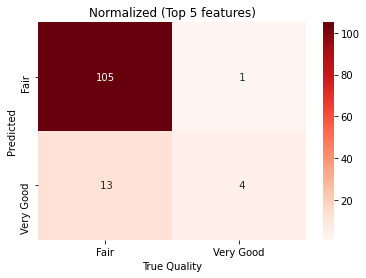

In [34]:
# Plot Confusion Matrix - (Normalized)

label_aux = plt.subplot()
cm_svm_red = confusion_matrix(y_test, grid_predictions)
cm_svm = pd.DataFrame(cm_svm_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.Reds,fmt='3')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_title('Normalized (Top 5 features)')
plt.savefig('Resources/images/svm_red_cm_nor_selected.jpg');

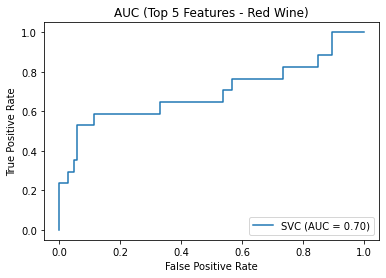

In [35]:
from sklearn.metrics import plot_roc_curve

svm_disp = plot_roc_curve(model_svm, X_test_scaled, y_test)
plt.title('AUC (Top 5 Features - Red Wine)')
plt.savefig('Resources/images/svm_red_auc_selected.jpg');
plt.show()

In [36]:
# Save the Model (test all features, selected features)
import joblib

filename = 'Resources/results/svm_red_selected.sav'
joblib.dump(model_svm, filename)

['Resources/results/svm_red_selected.sav']